# Case Study on Titanic: Machine Learning from Disaster.

## Karan Trehan
### 18BCS6033
### 18AITAIML1 - Group B

![Image of Titanic](titanic.jpeg "Titanic")

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data analysis
import pandas as pd
import numpy as np

#Statistical Libraries
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('bright')
sns.set_style("darkgrid")

In [3]:
#Reading the Datasets into two separate DataFrames 'train_df' and 'test_df'
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
#Taking a look at the first 5 rows of training data.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Taking a look at the first 5 rows of testing data.
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Checking information about the Training DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Checking information about the Testing DataFrame
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#Viewing the Statistical Measures/Details of the Training DataFrame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Viewing the Statistical Measures/Details of the Testing DataFrame
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Checking for Missing and Duplicated Values

In [10]:
#Checking for duplicacy in both the DataFrames using '.duplicated()' method and then checking the number of rows using
# '.shape[0]'
print("Number of Duplicate Rows in Training DataFrame:" , train_df[train_df.duplicated()].shape[0])
print("Number of Duplicate Rows in Testing DataFrame:" , test_df[test_df.duplicated()].shape[0])

Number of Duplicate Rows in Training DataFrame: 0
Number of Duplicate Rows in Testing DataFrame: 0


In [11]:
#Checking the Percentage of Columns having Missing Values in both the DataFrames
print('-+-'*10)
print('Training Data')
print(round(train_df.isnull().sum()/len(train_df)*100,2))
print('-+-'*10)
print('Testing Data')
print(round(test_df.isnull().sum()/len(test_df)*100,2))
print('-+-'*10)

-+--+--+--+--+--+--+--+--+--+-
Training Data
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64
-+--+--+--+--+--+--+--+--+--+-
Testing Data
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64
-+--+--+--+--+--+--+--+--+--+-


In [12]:
#Dropping 'cabin' variable because it has 77.10% and 78.23% missing values in 'train_df' and 'test_df' respectively
train_df.drop(columns=['Cabin'],axis=1,inplace=True)
test_df.drop(columns=['Cabin'],axis=1,inplace=True)

In [13]:
#Grouping the DataFrames according to their 'Pclass' and their 'Sex'.
#After Grouping, calculating the median 'Age' based on the above mentioned features.
print('-+-'*10)
print('Training Data')
print(train_df.groupby(['Pclass', 'Sex']).median()['Age'])
print('-+-'*10)
print('Testing Data')
print(test_df.groupby(['Pclass', 'Sex']).median()['Age'])
print('-+-'*10)

-+--+--+--+--+--+--+--+--+--+-
Training Data
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
-+--+--+--+--+--+--+--+--+--+-
Testing Data
Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64
-+--+--+--+--+--+--+--+--+--+-


In [14]:
#Filling the Missing Values in 'Age' column based on the median values calculated in the above cell.
train_df['Age'] = train_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda a:a.fillna(a.median()))
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda a:a.fillna(a.median()))

#Filling the Missing Values in 'Embarked' column based on the mode value.
mode = train_df['Embarked'].mode()
train_df['Embarked'] = train_df['Embarked'].fillna(str(mode[0]))

#Filling the Missing Values in 'Fare' column based on the median value.
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [15]:
#Again Checking the Percentage of Columns having Missing Values in case all the values have not been imputed.
print('-+-'*10)
print('Training Data')
print(round(train_df.isnull().sum()/len(train_df)*100,2))
print('-+-'*10)
print('Testing Data')
print(round(test_df.isnull().sum()/len(test_df)*100,2))
print('-+-'*10)

-+--+--+--+--+--+--+--+--+--+-
Training Data
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64
-+--+--+--+--+--+--+--+--+--+-
Testing Data
PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64
-+--+--+--+--+--+--+--+--+--+-


## Data Cleaning and Wrangling

In [16]:
#Dropping 'Ticket' and 'Name' columns.
train_df.drop(columns=['Ticket','Name'],axis=1,inplace=True)
test_df.drop(columns=['Ticket','Name'],axis=1,inplace=True)

* Dropping the column 'Ticket' because it has both numeric and categorical values and is of no use. It will not yield good results.
* Dropping 'Name' because we have unique values in it and is not of much use. 'Sex' variable will  be more handy in this scenario

In [17]:
#Combining the 'SibSp' , 'Parch' and the person's own count to create a new 'Family' variable.
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] + 1

In [18]:
#Calculating Fare Per Person
train_df['FarePP'] = train_df['Fare']/train_df['Family']
test_df['FarePP'] = test_df['Fare']/test_df['Family']

In [19]:
#Dropping 'SibSp','Parch' and 'Fare' columns as new columns have been created.
train_df.drop(columns=['SibSp','Parch','Fare'],axis=1,inplace=True)
test_df.drop(columns=['SibSp','Parch','Fare'],axis=1,inplace=True)

## Exploratory Data Analysis

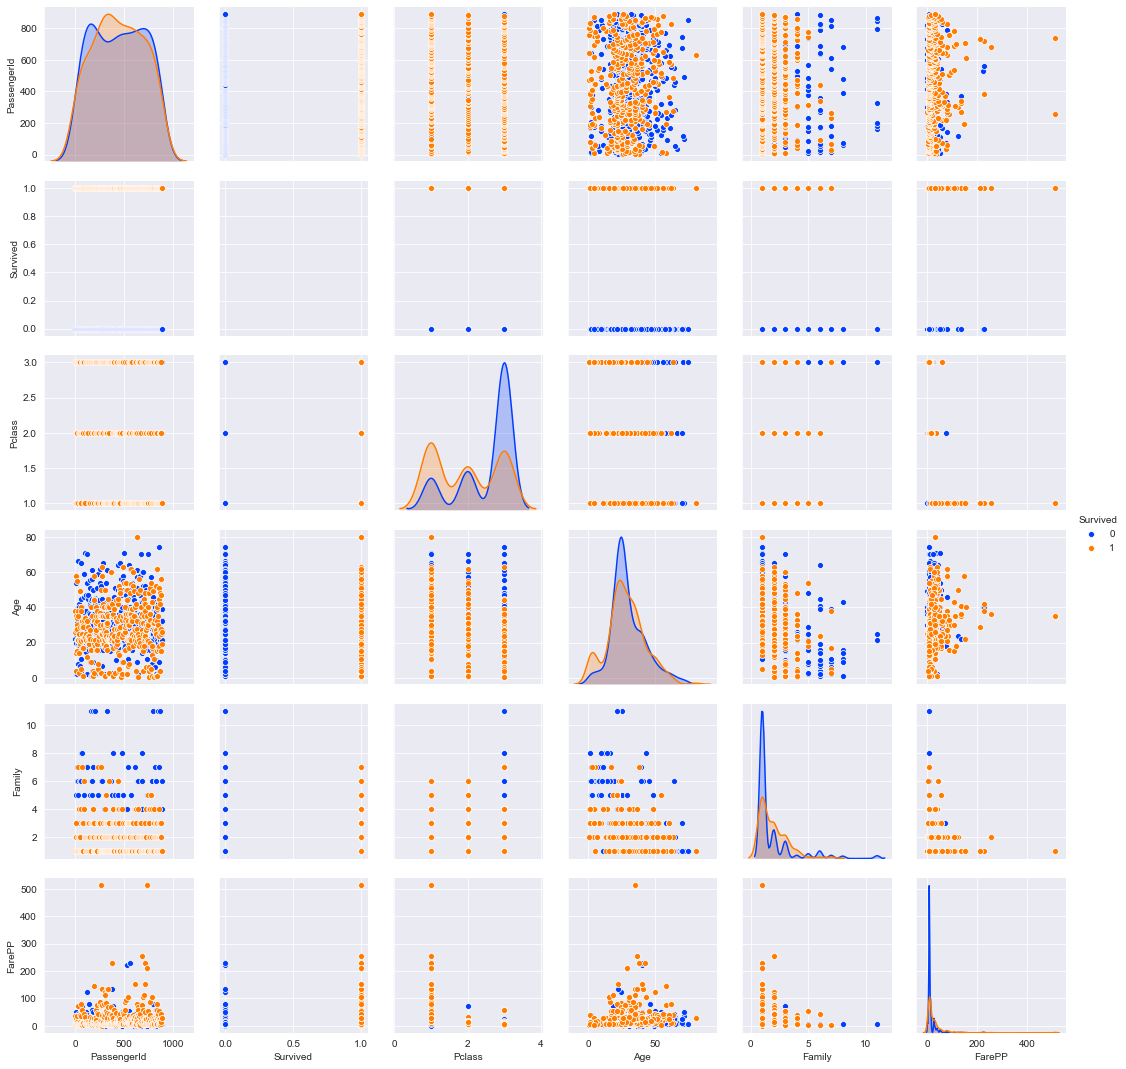

In [20]:
#Plotting PairPlot to check the relations among the Variables
sns.pairplot(data=train_df,hue='Survived')
plt.show()

* Fare and Age are continuous in Nature.
* PassengerId is discrete in Nature.
* Family and Pclass are ordinal in nature.
* Sex and Embarked are categorical in Nature.
* Survived is the Dependent Variable

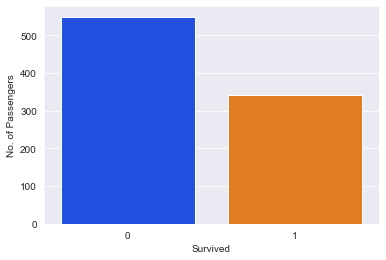

In [21]:
#Creating a Dataframe based on the number of people who survived and who did not.
sur = train_df.groupby('Survived')['Survived'].count().to_frame()
sur.rename(columns={'Survived' : 'No. of Passengers'} , inplace = True)
sns.barplot(data=sur, x=sur.index , y = 'No. of Passengers')
plt.show()

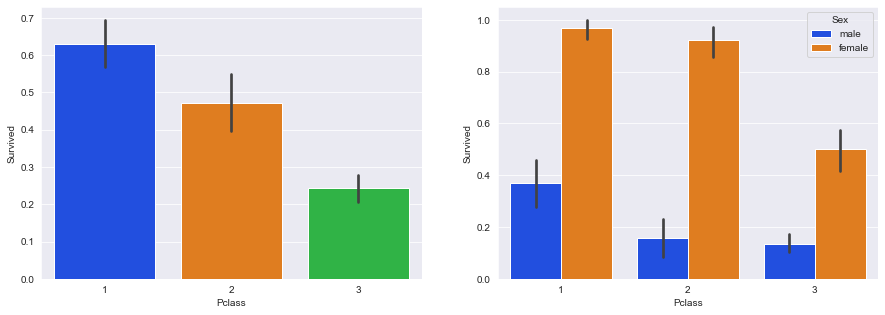

In [22]:
#Plotting 'Pclass' vs 'Survived' Graph to see how many people survived from each class.
fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.barplot(data=train_df,x='Pclass',y='Survived',ax=axs[0])
sns.barplot(data=train_df,x='Pclass',y='Survived',hue='Sex',ax=axs[1])
plt.show()

* From First Plot, People belonging to class 1 had more chances of survival than people of class 2 followed by class 3.
* From Second Plot, Females from every class had better chances of survival.

In [23]:
#Confirming the above plots Statistically
psur = round(train_df[['Survived','Pclass']].groupby('Pclass').mean()*100 , 2)
psur = pd.DataFrame(psur)
psur

,Survived
Pclass,
1,62.96
2,47.28
3,24.24


In [24]:
psurse = round(train_df[['Survived','Pclass','Sex']].groupby(['Sex','Pclass']).mean()*100 , 2)
psurse = pd.DataFrame(psurse)
psurse

Survived
Sex    Pclass          
female 1          96.81
       2          92.11
       3          50.00
male   1          36.89
       2          15.74
       3          13.54

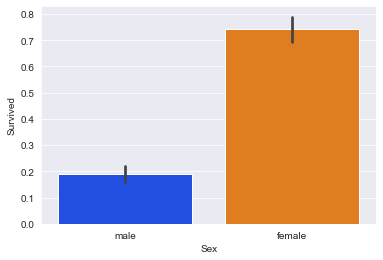

In [25]:
#Plotting 'Sex' vs 'Survived' Graph to see how many people survived based on Gender.
sns.barplot(data=train_df,x='Sex',y='Survived')
plt.show()

* Evident that Females survived more than Males

In [26]:
#Confirming the above plot Statistically
agesur = round(train_df[['Survived','Sex']].groupby('Sex').mean()*100 , 2)
agesur = pd.DataFrame(agesur)
agesur

,Survived
Sex,
female,74.20
male,18.89


* We can observe that the percentage of Females Surviving was very high as compared to Males.

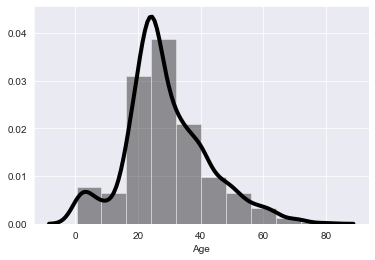

In [27]:
#Checking the Distribution Plot of 'Age' to see ranges of people present on the ship.
sns.distplot(train_df['Age'],color='k',bins=10,kde_kws=dict(linewidth=4))
plt.show()

* 20 to 40 year olds had the maximum count
* Infants followed after the age range mentioned above.

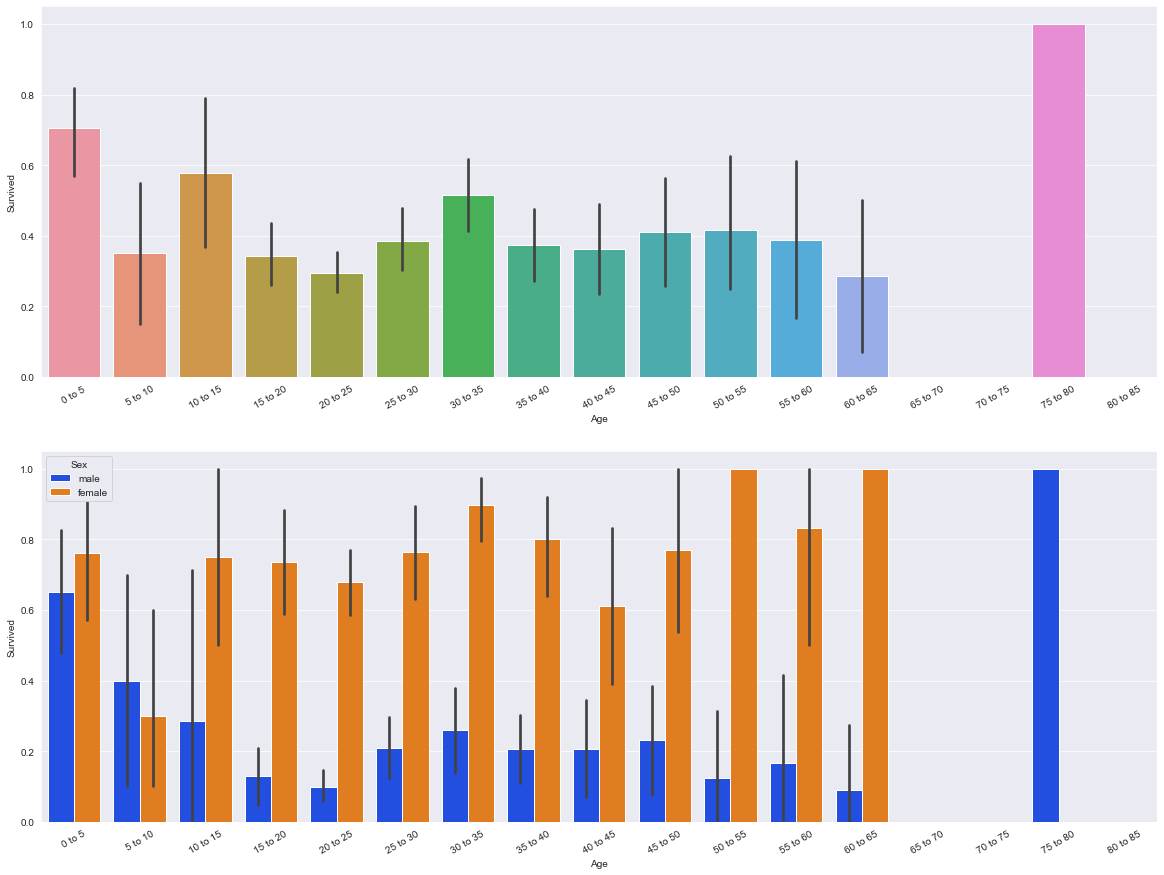

In [28]:
#Creating Binned Age and Plotting the graph of 'Age' vs 'Survived'
binnedAge = pd.cut(train_df['Age'], bins=list(range(0,90,5)), include_lowest=True)
labels = [str(i) + ' to ' + str(j) for i , j in zip(range(0,90,5) , range(5,95,5))]


fig, axs = plt.subplots(2,1,figsize = (20,15))
sns.barplot(data=train_df,x=binnedAge,y='Survived',ax=axs[0])
sns.barplot(data=train_df,x=binnedAge,y='Survived',hue='Sex',ax=axs[1])
axs[0].set_xticklabels(labels,rotation=30)
axs[1].set_xticklabels(labels,rotation=30)
plt.show()

* We can infer that the children of age 0 to 5 and 10 to 15 had higher chances of survival
* Also young people of age 20 to 25 had the least chances of survival
* Old people, 75 to 80, also had a very good chances of survival
* In every age range, we can clearly see that Females had far better chances of survival than Males

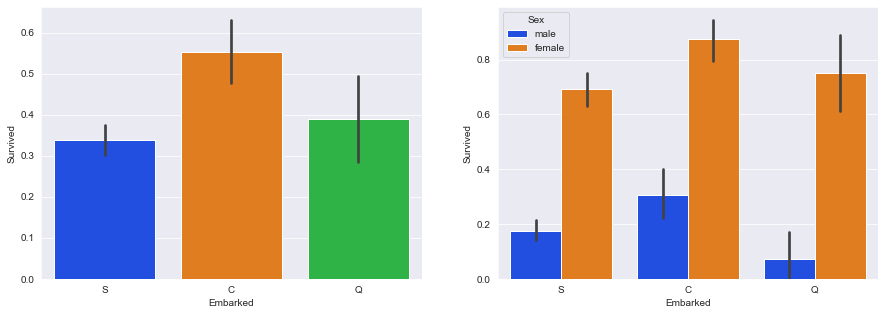

In [29]:
#Plotting 'Embarked' vs 'Survived' Graph to see how many people had the chance to survive based on the Port they boarded from.
fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.barplot(data=train_df,x='Embarked',y='Survived',ax=axs[0])
sns.barplot(data=train_df,x='Embarked',y='Survived',hue='Sex',ax=axs[1])
plt.show()

* People who embarked from Cherbourg had more chances of survival than Queenstown and Southampton

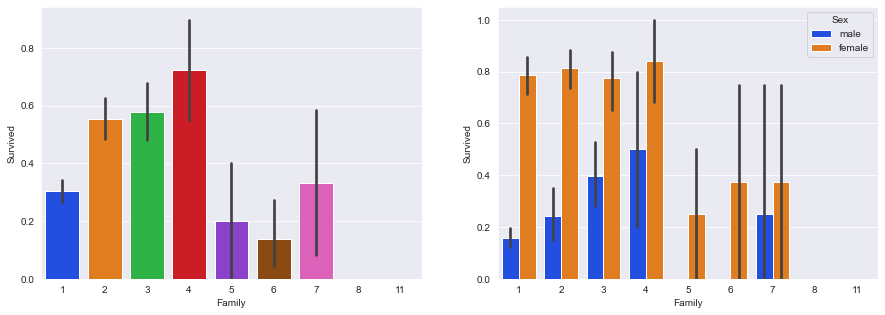

In [30]:
#Plotting 'Family' vs 'Survived' Graph to see how many people survived based on Family Count.
fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.barplot(data=train_df,x='Family',y='Survived',ax=axs[0])
sns.barplot(data=train_df,x='Family',y='Survived',hue='Sex',ax=axs[1])
plt.show()

* Nothing Concrete can be said from the above graphs

In [31]:
#Creating separate Lists for Numerical and Categorical Features
num_features=[i for i in train_df.columns if train_df[i].dtypes!='O']
cat_features=[i for i in train_df.columns if train_df[i].dtypes=='O']

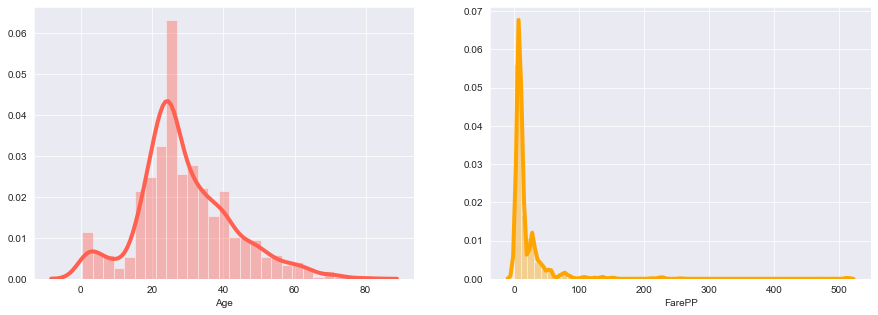

In [32]:
#Checking Skewness of the Continuous Variables 'Age' and 'FarePP'
fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.distplot(train_df['Age'],color='#FF6050',kde_kws=dict(linewidth=4),ax=axs[0])
sns.distplot(train_df['FarePP'],color='orange',kde_kws=dict(linewidth=4),ax=axs[1])
plt.show()

In [33]:
#Calculating Skewness using the Skew function from the scipy.stats library
print('Age = ' , st.skew(train_df['Age']) , ' FarePP = ',st.skew(train_df['FarePP']))

Age =  0.5331838972036701  FarePP =  7.7525153713575365


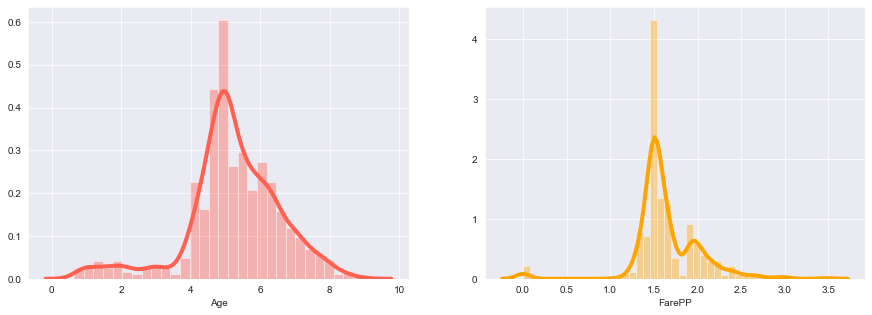

Age =  -0.6508369087687663  FarePP =  -0.2306287355826746


In [34]:
#Removing Skewness from the Variables and then checking there distribution plots.
age_train = np.sqrt(train_df['Age'])
farepp_train = np.power(train_df['FarePP'],0.20)

fig, axs = plt.subplots(1,2,figsize = (15,5))
sns.distplot(age_train,color='#FF6050',kde_kws=dict(linewidth=4),ax=axs[0])
sns.distplot(farepp_train,color='orange',kde_kws=dict(linewidth=4),ax=axs[1])
plt.show()
print('Age = ' , st.skew(age_train) , ' FarePP = ',st.skew(farepp_train))

* Such Transformation can add a huge bias so we will ignore it.

In [35]:
#Mapping 'Sex' to 0 and 1
# Male=0 and Female=1
train_df['Sex'] = train_df['Sex'].map({'male':1, 'female':0})
test_df['Sex'] = test_df['Sex'].map({'male':1, 'female':0})

In [36]:
#Mapping 'Embarked' to 0 and 1
# Q=0 , S=1 and C=0
train_df['Embarked'] = train_df['Embarked'].map({'Q':2, 'S':1, 'C':0})
test_df['Embarked'] = test_df['Embarked'].map({'Q':2, 'S':1, 'C':0})

In [37]:
#Dropping PassengerId because it contains unique discrete values, like an index.
train_df.drop(columns=['PassengerId'] , axis=1 , inplace = True)
train_df

,Survived,Pclass,Sex,Age,Embarked,Family,FarePP
0,0,3,1,22.0,1,2,3.62500
1,1,1,0,38.0,0,2,35.64165
2,1,3,0,26.0,1,1,7.92500
3,1,1,0,35.0,1,2,26.55000
4,0,3,1,35.0,1,1,8.05000
...,...,...,...,...,...,...,...
886,0,2,1,27.0,1,1,13.00000
887,1,1,0,19.0,1,1,30.00000
888,0,3,0,21.5,1,4,5.86250
889,1,1,1,26.0,0,1,30.00000


In [38]:
#Removing 'PassengerId' from and storing it in test_pid because we will use it later
test_pid = test_df.pop('PassengerId')
test_df

,Pclass,Sex,Age,Embarked,Family,FarePP
0,3,1,34.5,2,1,7.829200
1,3,0,47.0,1,2,3.500000
2,2,1,62.0,2,1,9.687500
3,3,1,27.0,1,1,8.662500
4,3,0,22.0,1,3,4.095833
...,...,...,...,...,...,...
413,3,1,24.0,1,1,8.050000
414,1,0,39.0,0,1,108.900000
415,3,1,38.5,1,1,7.250000
416,3,1,24.0,1,1,8.050000


In [39]:
#Removing the features mentioned below because 1 has been removed and 2 are Ordinal
num_features.remove('PassengerId')
num_features.remove('Pclass')
num_features.remove('Survived')

In [40]:
#Scaling the Features between 0 - 1, for easier and efficient performance by the Model
scaler = MinMaxScaler()
train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features] = scaler.fit_transform(test_df[num_features])

print('-+-'*25)
print('Training Data')
print(train_df.describe())
print('-+-'*25)
print('Testing Data')
print(test_df.describe())
print('-+-'*25)

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Training Data
         Survived      Pclass         Sex         Age    Embarked      Family  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587    0.360548    0.897868    0.090460   
std      0.486592    0.836071    0.477990    0.167183    0.514624    0.161346   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    0.264891    1.000000    0.000000   
50%      0.000000    3.000000    1.000000    0.321438    1.000000    0.000000   
75%      1.000000    3.000000    1.000000    0.447097    1.000000    0.100000   
max      1.000000    3.000000    1.000000    1.000000    2.000000    1.000000   

           FarePP  
count  891.000000  
mean     0.038874  
std      0.069957  
min      0.000000  
25%      0.014151  
50%      0.016201  
75%      0.046194  
max      1.000000  


In [41]:
#Splitting into Training and Testing Variables. Separating the Dependent Variable
y_train = train_df.pop('Survived')
X_train = train_df.copy()

X_test  = test_df.copy()

#Checking Shape of the Variables
X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

## GLM Model based Classification

In [42]:
#Adding a constant manually because GLM otherwise fits the line through the origin
X_train_sm = sm.add_constant(X_train)

#Create a first fitted model
logglm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()

#Viewing Summary
print(logglm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.80
Date:                Wed, 26 Aug 2020   Deviance:                       785.60
Time:                        00:08:05   Pearson chi2:                     905.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4663      0.569      9.604      0.0

In [43]:
#Defining a function which will calculate the VIF values and store them in a DataFrame
#High VIF Means High Multicollinearity
def calculateVIF(X_train_lm):
    vif = pd.DataFrame()
    vif['Features'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False).reset_index()
    vif = vif.drop(columns = ['index'],axis = 1)
    return vif

In [44]:
#Calculating VIF
vif = calculateVIF(X_train_sm.drop(columns=['const'],axis=1))
vif

,Features,VIF
0,Pclass,6.12
1,Embarked,4.38
2,Age,4.04
3,Sex,3.02
4,FarePP,1.39
5,Family,1.34


## GLM Model based Classification after removal of high P values

In [45]:
X_train_sm1 = sm.add_constant(X_train[X_train_sm.drop(columns=['const','Embarked','FarePP'],axis=1).columns])
logglm1 = sm.GLM(y_train,X_train_sm1,family=sm.families.Binomial()).fit()
print(logglm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -393.80
Date:                Wed, 26 Aug 2020   Deviance:                       787.60
Time:                        00:08:06   Pearson chi2:                     921.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5485      0.512     10.840      0.0

## GLM Model based Classification with Recursive Feature Elimination.

In [46]:
#Fitting the Training Data to RFE model
estimator = SVR(kernel="linear")
rfe = RFE(estimator,3, step=1)
rfe = rfe.fit(X_train, y_train)

In [47]:
#checking the listing of the features that got selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pclass', False, 3),
 ('Sex', True, 1),
 ('Age', False, 2),
 ('Embarked', False, 4),
 ('Family', True, 1),
 ('FarePP', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col #Printing the list of Columns that are selected by RFE

Index(['Sex', 'Family', 'FarePP'], dtype='object')

In [49]:
#Again building a GLM Model
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
logglmrfe = sm.GLM(y_train,X_train_rfe,family=sm.families.Binomial()).fit()
print(logglmrfe.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.41
Date:                Wed, 26 Aug 2020   Deviance:                       868.83
Time:                        00:08:06   Pearson chi2:                     903.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8552      0.179      4.786      0.0

In [50]:
#Defining a function print_matrix that will print the Confusion Matrix
import sklearn.metrics as sklm #For Performance Measures
def print_matrix(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels,scores)
    conf = sklm.confusion_matrix(labels,scores)
    fig, (ax1,ax2) = plt.subplots(figsize=(15,7), ncols=2, nrows=1)
    
    left   =  0.125  # the left side of the subplots of the figure
    right  =  0.9    # the right side of the subplots of the figure
    bottom =  0.1    # the bottom of the subplots of the figure
    top    =  0.9    # the top of the subplots of the figure
    wspace =  .5     # the amount of width reserved for blank space between subplots
    hspace =  1.1    # the amount of height reserved for white space between subplots

    # This function actually adjusts the sub plots using the above paramters
    plt.subplots_adjust(
            left    =  left, 
            bottom  =  bottom, 
            right   =  right, 
            top     =  top, 
            wspace  =  wspace, 
            hspace  =  hspace
    )
    
    sns.set(font_scale=1.4)#for label size
    
    ax1.set_title('Confusion Matrix\n')
    axes = ['Positive' , 'Negative']
    g1 = sns.heatmap(conf, cmap="Greens", annot=True,annot_kws={"size": 16} , xticklabels = axes , yticklabels = axes , ax=ax1)# font size
    g1.set_ylabel('Actual Label')
    g1.set_xlabel('Predicted Label')
    
    print('\nAccuracy :  %0.2f' % sklm.accuracy_score(labels, scores) , '\n') #Printing Accuracy Of the Model

    ax2.set_title('Performance Measure\n')
    xaxes = ['Positive' , 'Negative']
    yaxes = ['Precision' , 'Recall' , 'F-Score' , 'NumCase']
    g2 = sns.heatmap(metrics, cmap="Greens", annot=True,annot_kws={"size": 16} , xticklabels = xaxes , yticklabels = yaxes , ax=ax2)
   
    plt.yticks(rotation=0) 
    plt.show()

## Sk-learn Logistic Regression

In [51]:
#Creating an instance of LogisticRegression
logreg = LogisticRegression()

#Fitting the data.
logreg.fit(X_train, y_train)
logreg_Y_pred=logreg.predict(X_test)

#Storing the values predicted on training Data
logreg_Y_pred_train=logreg.predict(X_train)

#Checking the Accuracy
logreg_accuracy=logreg.score(X_train,y_train)
logreg_accuracy

0.7991021324354658

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.853


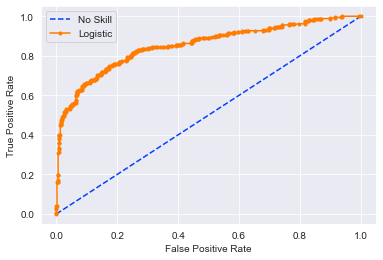

In [52]:
#Plotting the ROC Curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
lr_probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


Accuracy :  0.80 



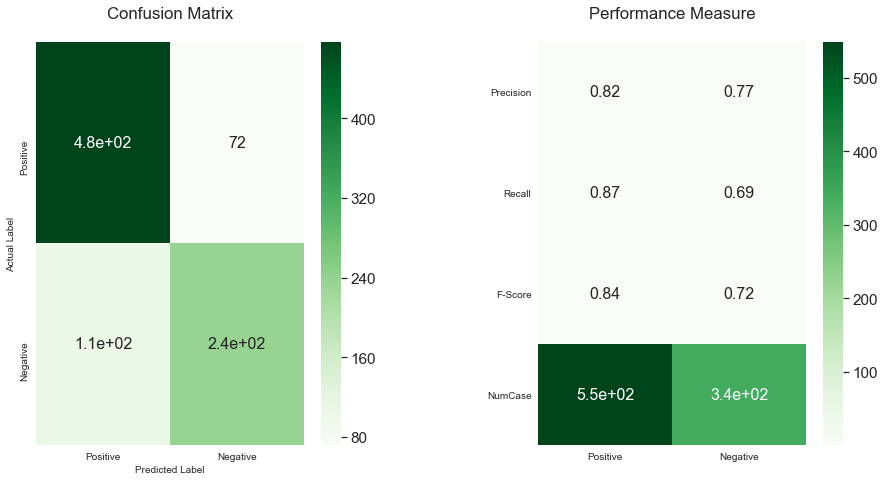

In [53]:
print_matrix(y_train,logreg_Y_pred_train) #displaying the produced analysis in confusion matrix

## Decision Tree based Classification

In [54]:
#Creating an instance of DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

#Fitting the data.
decision_tree.fit(X_train, y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)

#Storing the values predicted on training Data
decision_tree_Y_pred_train = decision_tree.predict(X_train)

#Checking the accuracy
decision_tree_accuracy = decision_tree.score(X_train, y_train)
decision_tree_accuracy

0.9809203142536476


Accuracy :  0.98 



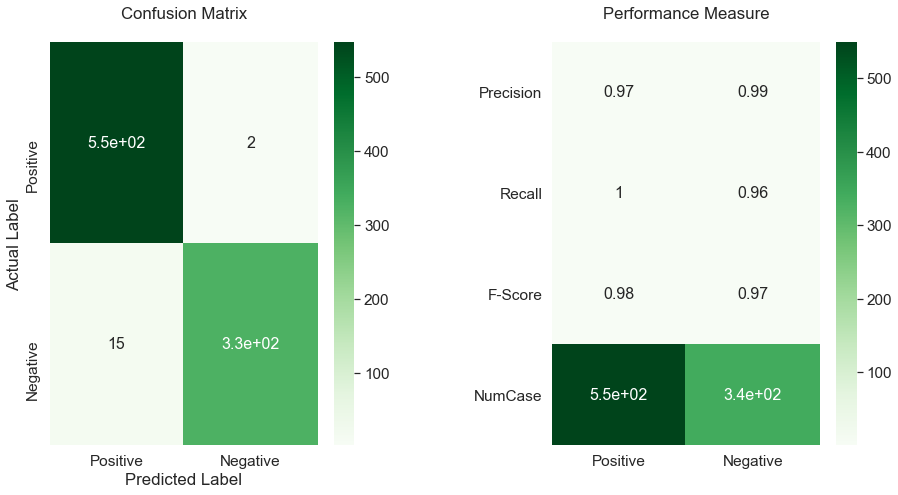

In [55]:
print_matrix(y_train,decision_tree_Y_pred_train) #displaying the produced analysis in confusion matrix

## Random Forest based Classification

In [56]:
#Creating an instance of RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

#Fitting the data.
random_forest.fit(X_train, y_train)
random_forest_Y_pred = random_forest.predict(X_test)

#Storing the values predicted on training Data
random_forest_Y_pred_train = random_forest.predict(X_train)

#Checking the accuracy
random_forest.score(X_train, y_train)
random_forest_accuracy = random_forest.score(X_train, y_train)
print(random_forest_accuracy)

#Feature Importance
random_forest.feature_importances_

0.9809203142536476


array([0.07193574, 0.26885973, 0.26747397, 0.03695173, 0.07817132,
       0.27660752])


Accuracy :  0.98 



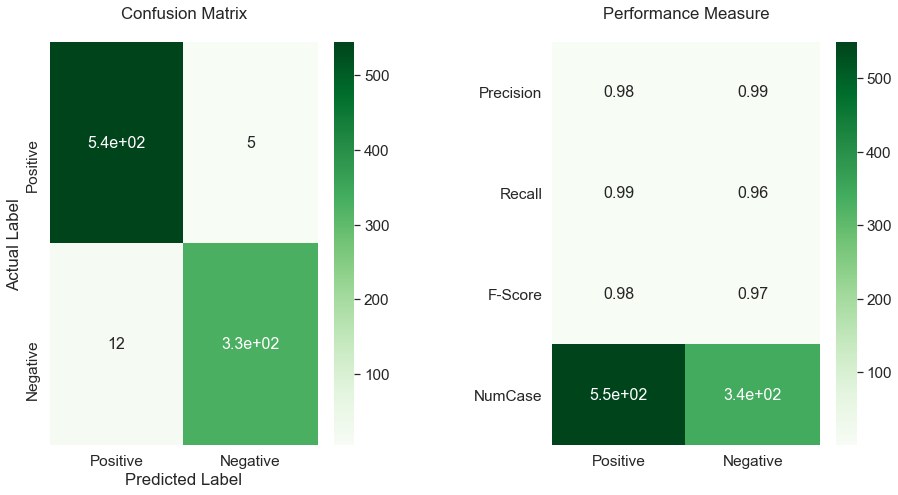

In [57]:
print_matrix(y_train,random_forest_Y_pred_train) #displaying the produced analysis in confusion matrix

In [58]:
#Creating the Model DataFrame based on accuracy
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest'],
    'Score': [logreg_accuracy,decision_tree_accuracy, random_forest_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,0.980920
2,Random Forest,0.980920
0,Logistic Regression,0.799102


In [59]:
#Creating submission file from each model
logreg_submission = pd.DataFrame({"PassengerId": test_pid, "Survived": logreg_Y_pred})
logreg_submission.to_csv('logreg_submission.csv', index=False)

decision_tree_submission = pd.DataFrame({"PassengerId": test_pid, "Survived": decision_tree_Y_pred})
decision_tree_submission.to_csv('decision_tree_submission.csv', index=False)

random_forest_submission = pd.DataFrame({"PassengerId": test_pid, "Survived": random_forest_Y_pred})
random_forest_submission.to_csv('random_forest_submission.csv', index=False)